Graduation Rates among postsecondary education students in the U.S: 

We are interested in learning about what exactly affects an undergraduate student’s likelihood to complete college. Particularly, we are observing a student’s financial aid,  received to discover whether or not these variables have a significant impact on graduation rates. The goal is to use our data analysis skills to determine the extent that these factors affect the percentage of students who graduate within 100% of normal time for that specific institution.

For this machine learning model, use Linear Regression as a baseline, and test the training data against the x variables.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

plt.figure().set_figwidth(50)

<Figure size 5000x480 with 0 Axes>

In [3]:
data_1 = pd.read_csv("cc_institution_details.csv")

data_1.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [4]:
data_1.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [8]:
data_2 = pd.read_csv("cc_institution_grads.csv")

In [9]:
data_2.head()

,index,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


In [10]:
data_2.shape

(1302102, 11)

In [11]:
# Select the needed column which are gender and race column
columns = ['unitid', 'gender', 'race']
data_2 = data_2[columns]

data_2

,unitid,gender,race
0,100760,B,X
1,100760,M,X
2,100760,F,X
3,100760,B,W
4,100760,M,W
...,...,...,...
1302097,168591,F,Ai
1302098,168740,F,Ai
1302099,169716,F,Ai
1302100,170082,F,Ai


### Combine the Dataset

In [12]:
# Combining the two dataframe (data_1 and data_2)

# Taking the intersection of the two dataframes

df = data_1.merge(data_2, on = 'unitid', how = 'inner')

In [13]:
# Display the first 5 rows of the dataset
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,gender,race
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,B,X
1,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,M,X
2,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,F,X
3,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,B,W
4,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,M,W


Now, we need to decide what columns you want to exclude...

For example I dont think city or state will have an effect on the graduation rate. So we could exclude city, state, long and lat. 
Essentially anything related to location 

Columns we want to consider: school type, gender, race, funding, Cohort size or student count e.t.c. So we will drop unnecessary columns.

In [14]:
df = df[[
        'index', 
        'level', 
        'control',
         'gender', 
         'race',
        'student_count',
        'awards_per_value', 
        'awards_per_state_value', 
        'awards_per_natl_value',
        'exp_award_value', 
        'exp_award_state_value', 
        'exp_award_natl_value',
        'exp_award_percentile',  
        'aid_value', 
        'aid_percentile',
        'med_sat_value',
        'grad_100_value',
        'grad_100_percentile', 
        'grad_150_value', 
        'grad_150_percentile',
        'pell_value', 
        'pell_percentile', 
        'retain_value', 
        'retain_percentile',
        'cohort_size']]

In [15]:
df.head()

,index,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,...,med_sat_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,B,X,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,0,4-year,Public,M,X,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
2,0,4-year,Public,F,X,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
3,0,4-year,Public,B,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
4,0,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259496 entries, 0 to 1259495
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   index                   1259496 non-null  int64  
 1   level                   1259496 non-null  object 
 2   control                 1259496 non-null  object 
 3   gender                  1259496 non-null  object 
 4   race                    1259496 non-null  object 
 5   student_count           1259496 non-null  int64  
 6   awards_per_value        1259496 non-null  float64
 7   awards_per_state_value  1259496 non-null  float64
 8   awards_per_natl_value   1259496 non-null  float64
 9   exp_award_value         1259496 non-null  int64  
 10  exp_award_state_value   1259496 non-null  int64  
 11  exp_award_natl_value    1259496 non-null  int64  
 12  exp_award_percentile    1259496 non-null  int64  
 13  aid_value               1259280 non-null  float64
 14  ai

In [17]:
#Getting the total number of nan values
df.isnull().sum(axis = 0)


index                          0
level                          0
control                        0
gender                         0
race                           0
student_count                  0
awards_per_value               0
awards_per_state_value         0
awards_per_natl_value          0
exp_award_value                0
exp_award_state_value          0
exp_award_natl_value           0
exp_award_percentile           0
aid_value                    216
aid_percentile               216
med_sat_value             691200
grad_100_value             99036
grad_100_percentile        99036
grad_150_value             99036
grad_150_percentile        99036
pell_value                   216
pell_percentile              216
retain_value               91476
retain_percentile          91476
cohort_size                99036
dtype: int64

From the information above, med_sat_value has alot of missing values. To avoid introducing bias in our model, it is best to drop this column.

In [18]:
df.head()

,index,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,...,med_sat_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
0,0,4-year,Public,B,X,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
1,0,4-year,Public,M,X,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
2,0,4-year,Public,F,X,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
3,0,4-year,Public,B,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0
4,0,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,...,823.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,882.0


In [19]:
# Determine the number of unique values in each column.
df.nunique()

index                     3798
level                        2
control                      3
gender                       3
race                         6
student_count             2829
awards_per_value           517
awards_per_state_value     160
awards_per_natl_value        6
exp_award_value           3611
exp_award_state_value      264
exp_award_natl_value         6
exp_award_percentile       101
aid_value                 3135
aid_percentile             101
med_sat_value              472
grad_100_value             806
grad_100_percentile        101
grad_150_value             862
grad_150_percentile        101
pell_value                 832
pell_percentile            101
retain_value               649
retain_percentile          101
cohort_size               1409
dtype: int64

In [20]:
# student_count = Total number of undergraduates in 2010
# cohort_size = 
df[['student_count', 'cohort_size']]  ## what is the difference between these 2 columns? 

,student_count,cohort_size
0,4051,882.0
1,4051,882.0
2,4051,882.0
3,4051,882.0
4,4051,882.0
...,...,...
1259491,144,23.0
1259492,144,23.0
1259493,144,23.0
1259494,144,23.0


cohort_size column may represent the size of a specific group of individuals who share a common characteristic within the larger population of student_count.

So, from the data, we can see that cohort_size is just a subset of data from the student_count. 

In [21]:
df.level.unique()

array(['4-year', '2-year'], dtype=object)

In [22]:
df.control.unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [23]:
# percentage of missing values
(df.isnull().sum() / df.shape[0])*100

index                      0.000000
level                      0.000000
control                    0.000000
gender                     0.000000
race                       0.000000
student_count              0.000000
awards_per_value           0.000000
awards_per_state_value     0.000000
awards_per_natl_value      0.000000
exp_award_value            0.000000
exp_award_state_value      0.000000
exp_award_natl_value       0.000000
exp_award_percentile       0.000000
aid_value                  0.017150
aid_percentile             0.017150
med_sat_value             54.879094
grad_100_value             7.863145
grad_100_percentile        7.863145
grad_150_value             7.863145
grad_150_percentile        7.863145
pell_value                 0.017150
pell_percentile            0.017150
retain_value               7.262905
retain_percentile          7.262905
cohort_size                7.863145
dtype: float64

Clearly, there are 59% of missing values for the label med_sat_value. We will drop this column as it may introduce bias to our model. 

### Data Cleaning

In [24]:
df.shape

(1259496, 25)

In [25]:
# Drop columns
df.drop('med_sat_value', axis = 1, inplace = True)

In [26]:
# Check for all duplicate rows

df.duplicated().sum()

1191132

In [27]:
# Drop all duplicated rows
df.drop_duplicates(inplace = True)

In [28]:
# Drop all empty or null values

df.dropna(inplace = True)

In [29]:
df.shape

(60822, 24)

In [30]:
# Check if the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60822 entries, 0 to 1259351
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   60822 non-null  int64  
 1   level                   60822 non-null  object 
 2   control                 60822 non-null  object 
 3   gender                  60822 non-null  object 
 4   race                    60822 non-null  object 
 5   student_count           60822 non-null  int64  
 6   awards_per_value        60822 non-null  float64
 7   awards_per_state_value  60822 non-null  float64
 8   awards_per_natl_value   60822 non-null  float64
 9   exp_award_value         60822 non-null  int64  
 10  exp_award_state_value   60822 non-null  int64  
 11  exp_award_natl_value    60822 non-null  int64  
 12  exp_award_percentile    60822 non-null  int64  
 13  aid_value               60822 non-null  float64
 14  aid_percentile          60822 non-nu

In [31]:
# Check for correlation of the numerical values

df.corr()

,index,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,cohort_size
index,1.000000,-0.159792,0.158856,0.261562,0.312253,-0.014937,-0.181310,-0.181634,-0.007905,-0.120668,-0.030349,0.031193,-0.041326,0.036642,-0.052892,0.228432,0.032491,-0.109598,-0.098326,-0.146959
student_count,-0.159792,1.000000,-0.182886,-0.275140,-0.303494,-0.038292,-0.048320,-0.072832,0.008415,-0.112349,0.008742,-0.138051,0.005701,-0.081164,0.057620,-0.253487,-0.159960,0.111270,0.202730,0.744660
awards_per_value,0.158856,-0.182886,1.000000,0.592724,0.520740,-0.180252,-0.190546,-0.177048,-0.252501,-0.040245,0.026450,0.308617,0.180637,0.351622,0.184945,0.201651,-0.026262,0.130746,0.104256,-0.090817
awards_per_state_value,0.261562,-0.275140,0.592724,1.000000,0.834915,-0.045491,-0.201211,-0.172725,-0.055855,-0.010431,0.017994,0.301843,0.021896,0.415342,0.063166,0.349796,-0.004632,0.114697,0.023109,-0.156145
awards_per_natl_value,0.312253,-0.303494,0.520740,0.834915,1.000000,-0.016720,-0.101575,-0.119132,0.012804,0.036382,0.002333,0.331156,-0.058285,0.461919,-0.003630,0.409548,-0.008814,0.132783,-0.005987,-0.189356
exp_award_value,-0.014937,-0.038292,-0.180252,-0.045491,-0.016720,1.000000,0.245963,0.229717,0.352484,0.254816,0.065539,0.091841,-0.002238,0.054361,-0.008021,-0.125575,-0.078116,0.105842,0.040489,-0.009876
exp_award_state_value,-0.181310,-0.048320,-0.190546,-0.201211,-0.101575,0.245963,1.000000,0.808966,0.148450,0.651093,0.098945,0.318802,0.049520,0.296587,0.036651,-0.340603,-0.064948,0.368601,0.086079,0.012234
exp_award_natl_value,-0.181634,-0.072832,-0.177048,-0.172725,-0.119132,0.229717,0.808966,1.000000,-0.004882,0.704609,0.024723,0.345117,0.015254,0.329882,-0.003934,-0.361074,0.000467,0.395234,0.020342,-0.032558
exp_award_percentile,-0.007905,0.008415,-0.252501,-0.055855,0.012804,0.352484,0.148450,-0.004882,1.000000,0.204971,0.215906,0.061574,0.010189,0.016018,0.001510,-0.085182,-0.157135,0.036458,0.075121,0.088539
aid_value,-0.120668,-0.112349,-0.040245,-0.010431,0.036382,0.254816,0.651093,0.704609,0.204971,1.000000,0.510248,0.581244,0.279616,0.520504,0.257222,-0.366146,-0.192807,0.469687,0.232307,-0.002471


Cohort size has a very low correlation (less than 5%) with grad_100_value while student_count is negatively correlated with grad_100_value. So we will drop the colume cohort_size.

In [32]:
# Drop column for cohort size and index

df.drop(['cohort_size', 'index'], axis = 1, inplace  = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60822 entries, 0 to 1259351
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level                   60822 non-null  object 
 1   control                 60822 non-null  object 
 2   gender                  60822 non-null  object 
 3   race                    60822 non-null  object 
 4   student_count           60822 non-null  int64  
 5   awards_per_value        60822 non-null  float64
 6   awards_per_state_value  60822 non-null  float64
 7   awards_per_natl_value   60822 non-null  float64
 8   exp_award_value         60822 non-null  int64  
 9   exp_award_state_value   60822 non-null  int64  
 10  exp_award_natl_value    60822 non-null  int64  
 11  exp_award_percentile    60822 non-null  int64  
 12  aid_value               60822 non-null  float64
 13  aid_percentile          60822 non-null  float64
 14  grad_100_value          60822 non-nu

Now, Our data is now clean and free from null values.

In [34]:
# Reset the index 

df = df.reset_index(drop = True)

df.head()

,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,aid_value,aid_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile
0,4-year,Public,B,X,4051,14.2,18.8,21.5,105331,75743,...,7142.0,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0
1,4-year,Public,M,X,4051,14.2,18.8,21.5,105331,75743,...,7142.0,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0
2,4-year,Public,F,X,4051,14.2,18.8,21.5,105331,75743,...,7142.0,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0
3,4-year,Public,B,W,4051,14.2,18.8,21.5,105331,75743,...,7142.0,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0
4,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,75743,...,7142.0,72.0,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0


In [35]:
# Check for the datatypes
df.dtypes

level                      object
control                    object
gender                     object
race                       object
student_count               int64
awards_per_value          float64
awards_per_state_value    float64
awards_per_natl_value     float64
exp_award_value             int64
exp_award_state_value       int64
exp_award_natl_value        int64
exp_award_percentile        int64
aid_value                 float64
aid_percentile            float64
grad_100_value            float64
grad_100_percentile       float64
grad_150_value            float64
grad_150_percentile       float64
pell_value                float64
pell_percentile           float64
retain_value              float64
retain_percentile         float64
dtype: object

### Data Preprocessing

In [36]:
# Creating dummy variables for the categorical variables
# dont do drop_first = True here 
# for control we have 3 different types so it drops the first one
# drop_first = True is good for things that are one or the other like yes/no, male/female, pass/fail 
# we could use it for the 2-year / 4-year if you wanted but i think it is okay to keep for now 

train_features = df
train_features = pd.get_dummies(train_features, drop_first = False)

train_features.head()

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Public,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X
0,4051,14.2,18.8,21.5,105331,75743,66436,90,7142.0,72.0,...,1,1,0,0,0,0,0,0,0,1
1,4051,14.2,18.8,21.5,105331,75743,66436,90,7142.0,72.0,...,1,0,0,1,0,0,0,0,0,1
2,4051,14.2,18.8,21.5,105331,75743,66436,90,7142.0,72.0,...,1,0,1,0,0,0,0,0,0,1
3,4051,14.2,18.8,21.5,105331,75743,66436,90,7142.0,72.0,...,1,1,0,0,0,0,0,0,1,0
4,4051,14.2,18.8,21.5,105331,75743,66436,90,7142.0,72.0,...,1,0,0,1,0,0,0,0,1,0


In [37]:
## read more about the minmaxscaler here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [38]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Public,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X
0,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.023677,0.1049,0.275132,0.306748,0.019941,0.359141,0.541284,0.9,0.165867,0.72,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# There is some linear relation that as financial aid increases so does the graduation rate
# we could also argue that there isnt that strong of a linear relation because it looks like if the financial aid
# is around 5,000 we also have higher grad rates 
# when looking at this chart it seems like we could draw 2 lines...
# one straight up and down around the 5000 mark for financial aid
# and the other diagonal 

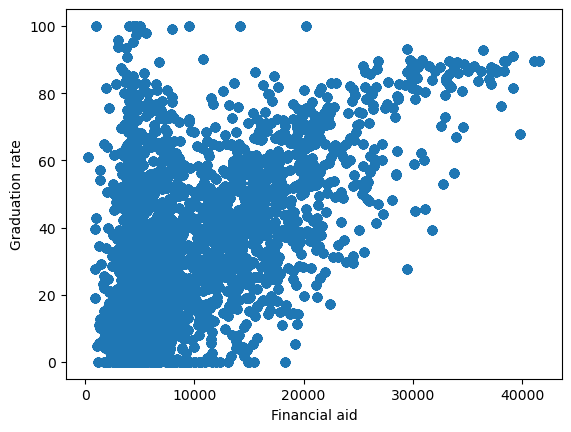

In [40]:
plt.scatter(df.aid_value, df.grad_100_value)
plt.xlabel('Financial aid')
plt.ylabel('Graduation rate')
plt.show()

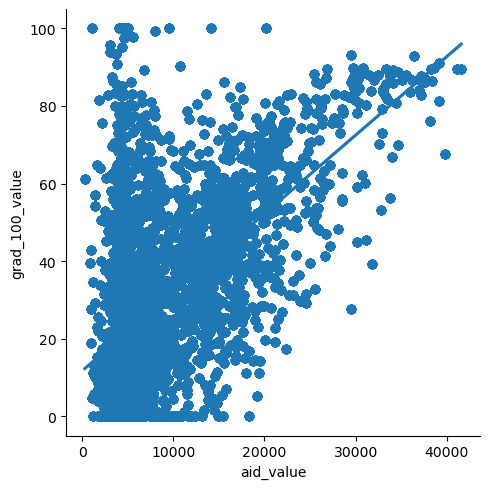

In [41]:
import seaborn as sns
sns.lmplot(x = 'aid_value', y = 'grad_100_value', data = df);

# See if other input variables are linear to our output variables

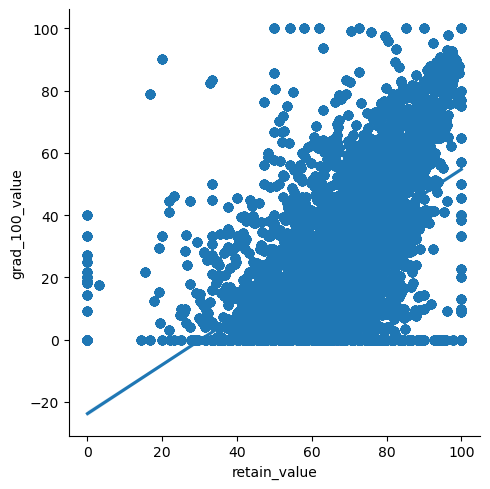

In [42]:
import seaborn as sns
sns.lmplot(x = 'retain_value', y = 'grad_100_value', data = df)

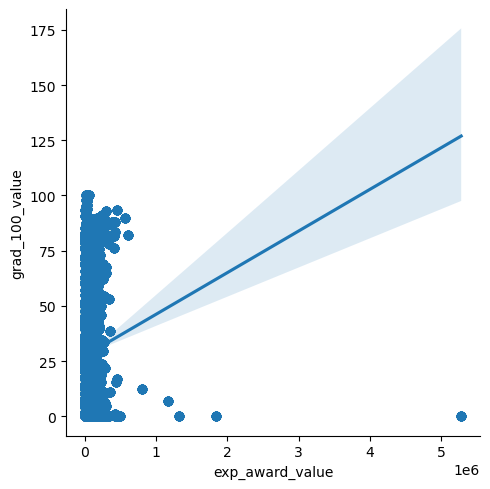

In [43]:
import seaborn as sns
sns.lmplot(x = 'exp_award_value', y = 'grad_100_value', data = df);

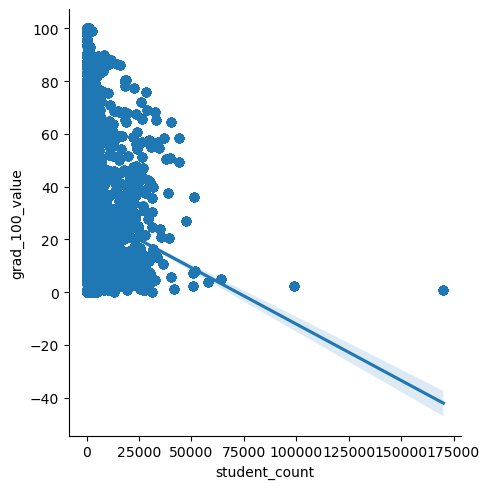

In [44]:
import seaborn as sns
sns.lmplot(x = 'student_count', y = 'grad_100_value', data = df)

### Categorical Data

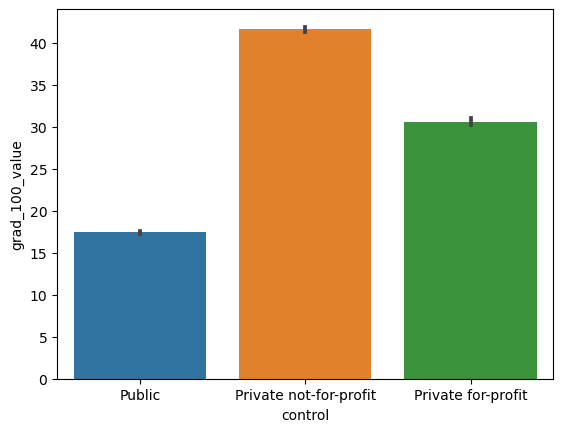

In [45]:
# Plot for the control variable
sns.barplot(data = df, x = 'control', y = 'grad_100_value');

In [46]:
# convert "Control" string to float, otherwise will give error
control_codes = {'Public': 1, 'Private not-for-profit' : 2, 'Private for-profit' : 3}
df['control_codes'] = df.control.map(control_codes)

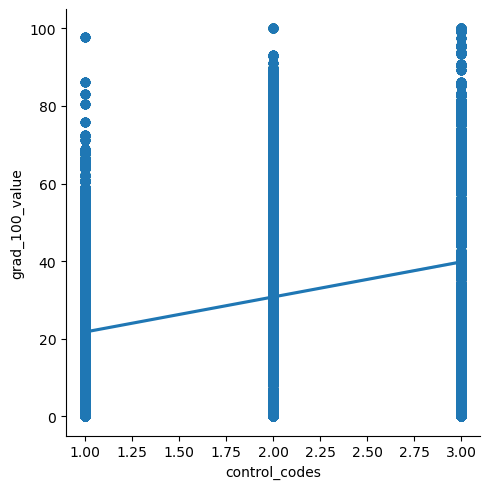

In [47]:
sns.lmplot(x = 'control_codes', y = 'grad_100_value', data = df);

In [89]:
# check the correlation of control with respect to the grad_100_value

df.grad_100_value.corr(df.control_codes)

0.30041324096264976

The correlation is moderate.

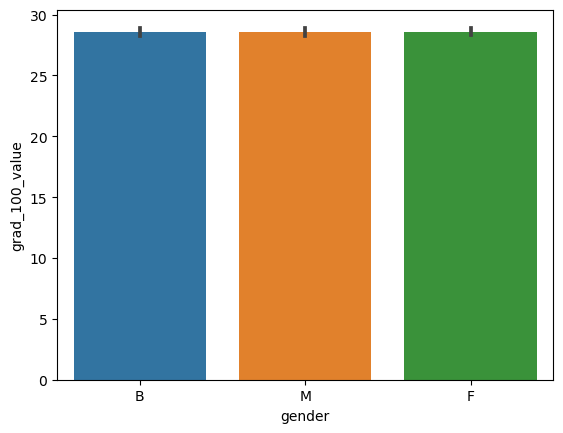

In [90]:
# Plot for the Gender variable
sns.barplot(data = df, x = 'gender', y = 'grad_100_value');

In [91]:
# Convert gender to numerical variables
gender_codes = {'M' : 1, 'F' : 0}
df['gender_codes'] = df.gender.map(gender_codes)

In [92]:
# check the correlation of gender with respect to the grad_100_value

df.grad_100_value.corr(df.gender_codes)

0.0

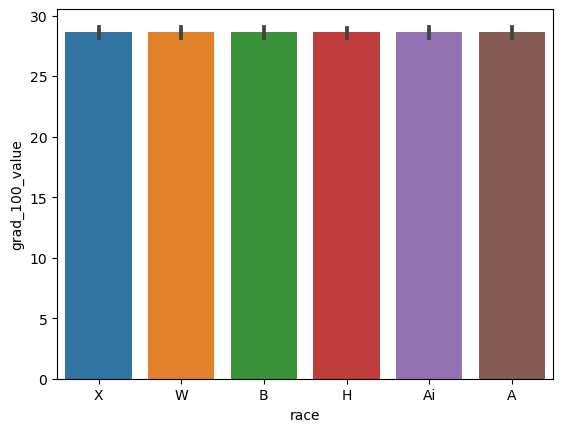

In [93]:
# Plot for the Race variable
sns.barplot(data = df, x = 'race', y = 'grad_100_value');

In [94]:
# Convert gender to numerical variables
race_codes = {'W': 1, 'B' : 2, 'H' : 3, 'Ai': 4, 'A' : 5}
df['race_codes'] = df.race.map(race_codes)

In [95]:
# check the correlation of race with respect to the grad_100_value

df.grad_100_value.corr(df.race_codes)

1.3160781773045371e-18

In [96]:
df.head()

,level,control,gender,race,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,control_codes,gender_codes,race_codes
0,4-year,Public,B,X,4051,14.2,18.8,21.5,105331,75743,...,15.0,29.1,14.0,71.2,98.0,63.1,17.0,1,NaN,NaN
1,4-year,Public,M,X,4051,14.2,18.8,21.5,105331,75743,...,15.0,29.1,14.0,71.2,98.0,63.1,17.0,1,1.0,NaN
2,4-year,Public,F,X,4051,14.2,18.8,21.5,105331,75743,...,15.0,29.1,14.0,71.2,98.0,63.1,17.0,1,0.0,NaN
3,4-year,Public,B,W,4051,14.2,18.8,21.5,105331,75743,...,15.0,29.1,14.0,71.2,98.0,63.1,17.0,1,NaN,1.0
4,4-year,Public,M,W,4051,14.2,18.8,21.5,105331,75743,...,15.0,29.1,14.0,71.2,98.0,63.1,17.0,1,1.0,1.0


## Linear Regression Model 

In [56]:
train_features_scaled = train_features_scaled.dropna()

In [57]:
#train_features_scaled = train_features_scaled.drop(columns = ['index'])
train_features_scaled.columns

print(train_features_scaled.isna().sum().sum())


0


In [58]:
# scale data
train_features_scaled.head()
x_values = train_features_scaled.drop(columns = ['grad_100_value'])
y_value = train_features_scaled.grad_100_value

In [59]:
y_value

0        0.100
1        0.100
2        0.100
3        0.100
4        0.100
         ...  
60817    0.421
60818    0.421
60819    0.421
60820    0.421
60821    0.421
Name: grad_100_value, Length: 60822, dtype: float64

In [60]:
# Make sure to get rid of index column. You dont need index column. it looks like it is just the value of 0 - 3797 but scaled 
# so lets get rid of it 
# x_values = x_values.drop(columns = 'index')
x_values


,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Public,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X
0,0.023677,0.10490,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.165867,0.72,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.023677,0.10490,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.165867,0.72,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.023677,0.10490,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.165867,0.72,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.023677,0.10490,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.165867,0.72,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.023677,0.10490,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.165867,0.72,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60817,0.000729,0.24732,0.613757,1.000000,0.014172,0.081649,0.000000,0.95,0.076055,0.12,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
60818,0.000729,0.24732,0.613757,1.000000,0.014172,0.081649,0.000000,0.95,0.076055,0.12,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60819,0.000729,0.24732,0.613757,1.000000,0.014172,0.081649,0.000000,0.95,0.076055,0.12,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60820,0.000729,0.24732,0.613757,1.000000,0.014172,0.081649,0.000000,0.95,0.076055,0.12,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# we need to split the data into a training set and a testing set to see how well this model preforms 
# use train_test_split

In [62]:
#train_x, test_x, train_y, test_y = train_test_split(x_values, y_value)
train_x, test_x, train_y, test_y = train_test_split(x_values, y_value, test_size = 0.2, random_state=42)

In [63]:
train_x

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,aid_value,aid_percentile,...,control_Public,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X
23796,0.001658,0.141654,0.375661,0.368098,0.011594,0.422260,1.000000,0.33,0.208812,0.24,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20964,0.079085,0.212098,0.319224,0.306748,0.009322,0.362160,0.541284,0.29,0.153733,0.63,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6811,0.029097,0.147779,0.389771,0.368098,0.010368,0.284811,1.000000,0.26,0.194303,0.21,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
51572,0.005502,0.131700,0.522046,0.496933,0.017113,0.075429,0.181568,0.87,0.103498,0.58,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36082,0.021990,0.081164,0.342152,0.368098,0.006673,0.382101,1.000000,0.08,0.163276,0.17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.016300,0.143951,0.352734,0.496933,0.009717,0.231691,0.181568,0.61,0.088601,0.29,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
38158,0.057941,0.091884,0.218695,0.000000,0.015821,0.238936,0.168790,0.96,0.077411,0.31,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
860,0.066329,0.128637,0.275132,0.306748,0.015233,0.359141,0.541284,0.80,0.144262,0.55,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15795,0.118422,0.148545,0.336861,0.306748,0.015336,0.298923,0.541284,0.81,0.113453,0.25,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
x_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60822 entries, 0 to 60821
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   student_count                   60822 non-null  float64
 1   awards_per_value                60822 non-null  float64
 2   awards_per_state_value          60822 non-null  float64
 3   awards_per_natl_value           60822 non-null  float64
 4   exp_award_value                 60822 non-null  float64
 5   exp_award_state_value           60822 non-null  float64
 6   exp_award_natl_value            60822 non-null  float64
 7   exp_award_percentile            60822 non-null  float64
 8   aid_value                       60822 non-null  float64
 9   aid_percentile                  60822 non-null  float64
 10  grad_100_percentile             60822 non-null  float64
 11  grad_150_value                  60822 non-null  float64
 12  grad_150_percentile             

### Creating, Training and Fitting the Model

In [65]:
# fit your linear regression model
regression = LinearRegression().fit(train_x, train_y)

In [66]:
# Check the performance of the training sets
regression.score(train_x, train_y)

0.9503673177567666

### Model Evaluation

In [67]:
# Now we have cleaned the data and successfully fitted the data in our Model
# Now predicting the test data

y_test_pred = regression.predict(test_x)

import sklearn.metrics as sm


print("Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(test_y, y_test_pred), 2))

print("Score of Our Linear Regression Model is : ",regression.score(x_values,y_value)*100)

print(f"\n\nDescription: \n\nNow our data is working accuratly and giving {round(regression.score(x_values,y_value)*100,2)} percent accurate result and \n\nModel Accuracy which is measured by R2 score is also approx {round(sm.r2_score(test_y, y_test_pred),2)} percent which is best")

Mean absolute error = 0.04
Mean squared error = 0.0
Median absolute error = 0.03
Explain variance score = 0.95
R2 score = 0.95
Score of Our Linear Regression Model is :  95.00296941584664


Description: 

Now our data is working accuratly and giving 95.0 percent accurate result and 

Model Accuracy which is measured by R2 score is also approx 0.95 percent which is best


### Additional metric

#### - Root Mean Squared Error (RMSE)

In [68]:
# Calculate RMSE
rmse = sm.mean_squared_error(test_y, y_test_pred, squared=False)
print("Root Mean Squared Error (RMSE) = ", round(rmse, 3))

Root Mean Squared Error (RMSE) =  0.053


### Model Performance

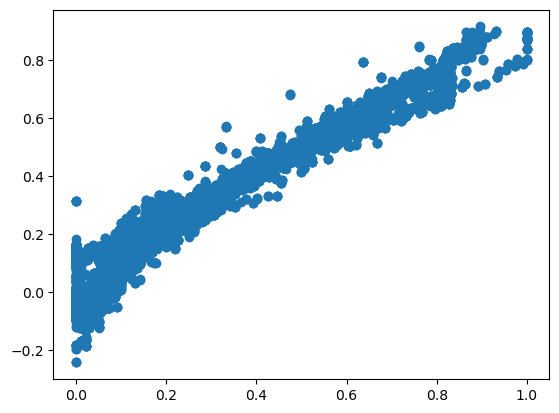

In [69]:
# Checking how well our model performs
plt.scatter(test_y, y_test_pred);

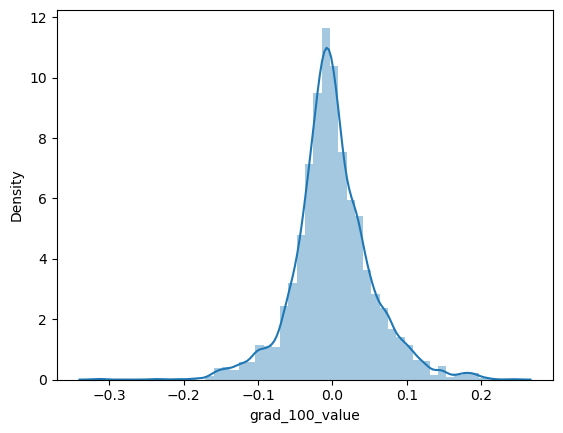

In [70]:
# Residual Histogram 

sns.distplot((test_y-y_test_pred),bins=50);

From the two plots above, our model perform well on the test dataset with a little modification needed to improve.

### Feature Importance
Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [71]:
# Define the regression coefficient
weights = regression.coef_

In [72]:
# create a dataframe to view the weight assigned to each column.

weights_df = pd.DataFrame({
    'columns': train_x.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [73]:
weights_df

,columns,weight
18,level_4-year,1.009135e+10
17,level_2-year,1.009135e+10
11,grad_150_value,8.314101e-01
10,grad_100_percentile,5.914834e-01
4,exp_award_value,1.306501e-01
8,aid_value,9.984469e-02
0,student_count,6.624024e-02
16,retain_percentile,6.190306e-02
1,awards_per_value,4.312715e-02
7,exp_award_percentile,1.949771e-02


From the above, we can see that though race and gender does not have much significant in improving the model but the task requires us to use them. The feature grad_150_value has the highest coefficient and it good in predicting the grad_100_value. Let's exclude the last 5 features from the model and check how well the model performs.

In [74]:
# Columns to exclude 
columns = ['awards_per_state_value', 'retain_value', 'control_Public',
           'exp_award_natl_value', 'grad_150_percentile'
]

In [75]:
#train_x, test_x, train_y, test_y = train_test_split(x_values, y_value)
#train_x, test_x, train_y, test_y = train_test_split(x_values, y_value, test_size = 0.2, random_state=42)
x2_values = x_values.drop(columns, axis = 1)

In [76]:
x2_values.head()

,student_count,awards_per_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_percentile,aid_value,aid_percentile,grad_100_percentile,grad_150_value,...,control_Private not-for-profit,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X
0,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.023677,0.1049,0.306748,0.019941,0.359141,0.9,0.165867,0.72,0.15,0.291,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
#train_x, test_x, train_y, test_y = train_test_split(x2_values, y_value)
train_x, test_x, train_y, test_y = train_test_split(x2_values, y_value, test_size = 0.2, random_state=42)

In [78]:
# fit your linear regression model
regression2 = LinearRegression().fit(train_x, train_y)

In [79]:
# Check the performance of the training sets
regression2.score(train_x, train_y)

0.9137796141043741

Observation: Removing those 5 features decreases the accuracy of our model, this shows that they have a significant impact in the model. 

### Test For Other Algorithm To Improve Performance

#### - Decision Tree Algorithm

In [80]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [81]:
# Create the decision tree model and fit the model on the training data
d_tree = DecisionTreeRegressor(max_depth=5).fit(train_x, train_y)

In [82]:
# Check the performance of the training sets
d_tree.score(train_x, train_y)

0.9566398077292663

In [83]:
# Make predictions on the test data
y_test_pred1 = d_tree.predict(test_x)

In [84]:
# Check the model performance

print("Decision Tree Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred1), 2)) 
print("Decision Tree Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred1), 2)) 
print("Decision Tree Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred1), 2)) 
print("Decision Tree Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred1), 2)) 
print("Decision Tree R2 score =", round(sm.r2_score(test_y, y_test_pred1), 2))
print("Decision Tree Root Mean Squared Error (RMSE) = ", round(sm.mean_squared_error(test_y, y_test_pred1, squared=False), 2))

Decision Tree Mean absolute error = 0.03
Decision Tree Mean squared error = 0.0
Decision Tree Median absolute error = 0.02
Decision Tree Explain variance score = 0.96
Decision Tree R2 score = 0.96
Decision Tree Root Mean Squared Error (RMSE) =  0.05


From above, our decision tree model performs better than the linear regression model.

#### - Random Forest Regression Model

In [85]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit the model
r_forest = RandomForestRegressor(n_estimators=100, max_depth=5).fit(train_x, train_y)

In [86]:
# Check the performance of the training sets
r_forest.score(train_x, train_y)

0.9633414524697429

In [87]:
# Make predictions on the test data
y_test_pred2 = r_forest.predict(test_x)

In [88]:
# Check the model performance

print("Decision Tree Mean absolute error =", round(sm.mean_absolute_error(test_y, y_test_pred2), 2)) 
print("Decision Tree Mean squared error =", round(sm.mean_squared_error(test_y, y_test_pred2), 2)) 
print("Decision Tree Median absolute error =", round(sm.median_absolute_error(test_y, y_test_pred2), 2)) 
print("Decision Tree Explain variance score =", round(sm.explained_variance_score(test_y, y_test_pred2), 2)) 
print("Decision Tree R2 score =", round(sm.r2_score(test_y, y_test_pred2), 2))
print("Decision Tree Root Mean Squared Error (RMSE) = ", round(sm.mean_squared_error(test_y, y_test_pred2, squared=False), 2))

Decision Tree Mean absolute error = 0.03
Decision Tree Mean squared error = 0.0
Decision Tree Median absolute error = 0.02
Decision Tree Explain variance score = 0.96
Decision Tree R2 score = 0.96
Decision Tree Root Mean Squared Error (RMSE) =  0.04


Finally, using Random Forest and Decision tree have a better performance than the linear regression model. 